In [1]:
import pandas as pd
import numpy as np

from transformers import pipeline
from transformers import AutoTokenizer,AutoModelForSeq2SeqLM
# from transformers import Conversation

<h1>Text Classification</h1>

In [2]:
help(pipeline)

Help on function pipeline in module transformers.pipelines:

pipeline(
    task: Optional[str] = None,
    model: Union[str, ForwardRef('PreTrainedModel'), ForwardRef('TFPreTrainedModel'), NoneType] = None,
    config: Union[str, transformers.configuration_utils.PretrainedConfig, NoneType] = None,
    tokenizer: Union[str, transformers.tokenization_utils.PreTrainedTokenizer, ForwardRef('PreTrainedTokenizerFast'), NoneType] = None,
    feature_extractor: Union[ForwardRef('SequenceFeatureExtractor'), str, NoneType] = None,
    image_processor: Union[str, transformers.image_processing_utils.BaseImageProcessor, NoneType] = None,
    processor: Union[str, transformers.processing_utils.ProcessorMixin, NoneType] = None,
    framework: Optional[str] = None,
    revision: Optional[str] = None,
    use_fast: bool = True,
    token: Union[str, bool, NoneType] = None,
    device: Union[int, str, ForwardRef('torch.device'), NoneType] = None,
    device_map: Union[str, dict[str, Union[int, str]], No

In [3]:
classifier = pipeline('text-classification')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Device set to use cpu


In [4]:
text = 'Trip was boring,it was total waste of time. But atleast i was able to meet old friends'
result = classifier(text)
df = pd.DataFrame(result)
df

,label,score
0,POSITIVE,0.989265


<h1>Question Answerering</h1>

In [5]:
qa = pipeline('question-answering')

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [6]:
text = 'Mumbai is capital city of Maharashtra.'
q = 'What is capital city of Maharashtra?'

a = qa(question = q,context = text)
a

{'score': 0.9965896606445312, 'start': 0, 'end': 6, 'answer': 'Mumbai'}

In [7]:
text = '''
Leati Joseph Anoaʻi (Samoan pronunciation: [a.noˈaʔ.i] ah-no-AH ee; born May 25, 1985), better known by his ring name Roman Reigns, is an American professional wrestler, actor and former football player. As a wrestler, he has been signed to WWE since 2010, where he performs on the Raw brand on a part-time basis. Regarded as one of the best professional wrestlers in the world,[9][10] Reigns' 1,316-day reign as WWE Universal Championship is the longest reign of the title's history, the fourth longest world title reign in WWE history and the longest championship reign recognised by the company since 1988.[a]

After playing U.S. college football for Georgia Tech, Anoaʻi started a professional football career with brief off-season stints with the Minnesota Vikings and Jacksonville Jaguars of the National Football League (NFL) in 2007. He played a full season for the Canadian Football League's (CFL) Edmonton Eskimos in 2008 before his release and retirement from football. A member of the Anoaʻi wrestling family, Anoaʻi was signed by WWE in 2010 and made his main roster debut under the ring name Roman Reigns in 2012 as a member of The Shield alongside Dean Ambrose and Seth Rollins; with Rollins, Reigns held the WWE Tag Team Championship once. The trio teamed together until disbanding in 2014, after which, Reigns entered singles competition.

From 2014 to 2020, WWE positioned Reigns as a heroic character and attempted to establish him as their next "face of the company", which was met with intense disapproval by audiences and critics.[11] During this period, Reigns won numerous championships and accomplishments, including winning the WWE Championship three times, the WWE Universal Championship once, and winning the Royal Rumble in 2015. After a hiatus, Reigns was repackaged as a villainous character between 2020 and 2024,[12][13] which was generally met with acclaim by audiences and critics.[14][15] Reigns then won his second Universal Championship and fourth WWE Championship, holding both simultaneously as the Undisputed WWE Universal Championship; upon losing the Undisputed title, the Universal Championship was retired with Reigns recognized as its final champion.[b]

Reigns has headlined numerous WWE pay-per-view and livestreaming events, including WWE's flagship event, WrestleMania, a record 10 times. Reigns holds the joint-record for most eliminations in a Survivor Series match (4) and is also WWE's 28th Triple Crown Champion and 17th Grand Slam Champion. He was also ranked at No. 1 in Pro Wrestling Illustrated's annual PWI 500 list of the top 500 singles wrestlers in 2016 and 2022,[16][17] and was named Wrestler of the Year by Sports Illustrated in 2021.[10]'''

q1 = 'What is the real name of Roman Reigns'
q2 = 'he join wwe with whom'
a1 = qa(question = q1,context =  text)
a2 = qa(question = q2,context =  text)

a1,a2

({'score': 0.946169743208884,
  'start': 1,
  'end': 20,
  'answer': 'Leati Joseph Anoaʻi'},
 {'score': 5.774882197329134e-06,
  'start': 1164,
  'end': 1193,
  'answer': 'Dean Ambrose and Seth Rollins'})

<h1>Name Entity Recognition</h1>

In [8]:
ner = pipeline("ner", model="FacebookAI/xlm-roberta-large-finetuned-conll03-english")

Some weights of the model checkpoint at FacebookAI/xlm-roberta-large-finetuned-conll03-english were not used when initializing XLMRobertaForTokenClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [9]:
result = ner("""Mark Zukerberg will meet Aditya Joshi
on  Monday 25 November 2025, 10am for $3 Trillion deal
at Pune for second time""")
result

[{'entity': 'I-PER',
  'score': np.float32(0.99999714),
  'index': 1,
  'word': '▁Mark',
  'start': 0,
  'end': 4},
 {'entity': 'I-PER',
  'score': np.float32(0.9999964),
  'index': 2,
  'word': '▁Zu',
  'start': 5,
  'end': 7},
 {'entity': 'I-PER',
  'score': np.float32(0.9999944),
  'index': 3,
  'word': 'ker',
  'start': 7,
  'end': 10},
 {'entity': 'I-PER',
  'score': np.float32(0.9999939),
  'index': 4,
  'word': 'berg',
  'start': 10,
  'end': 14},
 {'entity': 'I-PER',
  'score': np.float32(0.99999285),
  'index': 7,
  'word': '▁Adi',
  'start': 25,
  'end': 28},
 {'entity': 'I-PER',
  'score': np.float32(0.99998534),
  'index': 8,
  'word': 'tya',
  'start': 28,
  'end': 31},
 {'entity': 'I-PER',
  'score': np.float32(0.9999902),
  'index': 9,
  'word': '▁Josh',
  'start': 32,
  'end': 36},
 {'entity': 'I-PER',
  'score': np.float32(0.99999),
  'index': 10,
  'word': 'i',
  'start': 36,
  'end': 37},
 {'entity': 'I-LOC',
  'score': np.float32(0.9999801),
  'index': 25,
  'word':

<h1>Translation</h1>

In [10]:
trans = pipeline('translation_en_to_fr')


No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [11]:
text = trans('How are you?  Welcome to python programming language.')
text

[{'translation_text': 'Bienvenue au langage de programmation Python.'}]

<h1>English to Marathi</h1>

In [12]:
model="facebook/nllb-200-distilled-600M"

In [13]:
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSeq2SeqLM.from_pretrained(model)

In [14]:
english_text = 'Welcome to python programming'

In [15]:
inputs = tokenizer(english_text, return_tensors='pt')


In [16]:
translated_tokens = model.generate(**inputs,forced_bos_token_id = tokenizer.convert_tokens_to_ids('hin_Deva'),max_length = 50 )

In [17]:
tokenizer.batch_decode(translated_tokens,skip_special_tokens=True)[0]

'पायथन प्रोग्रामिंग में आपका स्वागत है'

<h1>Text Generation</h1>

In [18]:
 generator= pipeline('text-generation', model = 'gpt2')

Device set to use cpu


In [20]:
data = generator('I want to learn python programming so, ',num_return_sequences = 3)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [21]:
data[2]['generated_text']

"I want to learn python programming so, \xa0I'm looking forward to working with these guys.\nThis is a very small project at the moment, so please feel free to contact me if you have any questions.\nSee you soon!\n-Michael"

<h1>Text answersing</h1>

In [37]:
vqa = pipeline('visual-question-answering')

No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision d0a1f6a (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


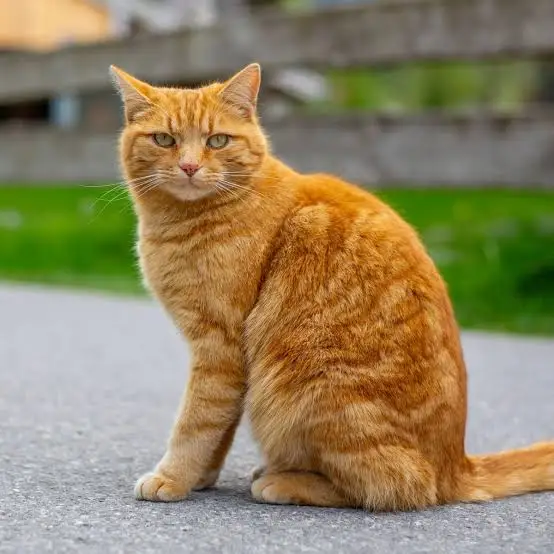

In [38]:
from PIL import Image
img = Image.open('meow.webp')
img

In [36]:
ans = vqa(question='what is the color of cat',image = img)
ans

[{'score': 0.9617254734039307, 'answer': 'orange'},
 {'score': 0.22403854131698608, 'answer': 'yellow'},
 {'score': 0.12328951805830002, 'answer': 'tan'},
 {'score': 0.11356377601623535, 'answer': 'brown'},
 {'score': 0.061388012021780014, 'answer': 'orange and white'}]

<h1>Coversations</h1>

In [39]:
conv = pipeline('conversation')

KeyError: "Unknown task conversation, available tasks are ['audio-classification', 'automatic-speech-recognition', 'depth-estimation', 'document-question-answering', 'feature-extraction', 'fill-mask', 'image-classification', 'image-feature-extraction', 'image-segmentation', 'image-text-to-text', 'image-to-image', 'image-to-text', 'keypoint-matching', 'mask-generation', 'ner', 'object-detection', 'question-answering', 'sentiment-analysis', 'summarization', 'table-question-answering', 'text-classification', 'text-generation', 'text-to-audio', 'text-to-speech', 'text2text-generation', 'token-classification', 'translation', 'video-classification', 'visual-question-answering', 'vqa', 'zero-shot-audio-classification', 'zero-shot-classification', 'zero-shot-image-classification', 'zero-shot-object-detection', 'translation_XX_to_YY']"

<h1>text_to_audio

In [40]:
pipe = pipeline('text-to-speech', model='suno/bark-small')

config.json: 0.00B [00:00, ?B/s]

C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dai\.cache\huggingface\hub\models--suno--bark-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regul

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


In [46]:
text = 'The doors will open on the left.'

output = pipe(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [47]:
from IPython.display import Audio
Audio(output['audio'], rate=output['sampling_rate'])

In [45]:
asr = pipeline('automatic-speech-recognition')

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 22aad52 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dai\.cache\huggingface\hub\models--facebook--wav2vec2-base-960h. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling b

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
output = asr('download.wav')
print()